In [23]:
import pandas as pd
import plotly.express as px

In [24]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [44]:
df['Year'] = df['Date'].dt.year

# Group the data by 'Country' and 'Year' to get the number of top performances per country per year
country_year_data = df.groupby(['Country', 'Year']).size().reset_index(name='Count')
total_count_by_year = country_year_data.groupby('Year')['Count'].sum().reset_index(name='TotalCount')
total_count_by_year['Cumulative_TotalCount'] = total_count_by_year['TotalCount'].cumsum()

# print(country_year_data.head(10))

# Create a list to store the cumulative data DataFrames
cumulative_data_frames = []
# Get sorted unique years
unique_years = sorted(country_year_data['Year'].unique())

for year in unique_years:
    year_data = country_year_data[country_year_data['Year'] <= year]
    year_cumulative = year_data.groupby(['Country'])['Count'].sum().reset_index()
    year_cumulative['Year'] = year
    cumulative_data_frames.append(year_cumulative)
print(total_count_by_year)

    Year  TotalCount  Cumulative_TotalCount
0   1962           1                      1
1   1964           1                      2
2   1965           1                      3
3   1966           1                      4
4   1967           2                      6
5   1968          14                     20
6   1969           1                     21
7   1971           2                     23
8   1972          10                     33
9   1973           6                     39
10  1974          20                     59
11  1975           7                     66
12  1976          64                    130
13  1977          35                    165
14  1978          65                    230
15  1979          87                    317
16  1980         150                    467
17  1981          93                    560
18  1982         141                    701
19  1983         154                    855
20  1984         289                   1144
21  1985         194            

In [45]:
# Concatenate all the data frames in the list to create a single data frame with cumulative data
cumulative_data = pd.merge(cumulative_data, total_count_by_year[['Year', 'Cumulative_TotalCount']], on='Year', how='left')
cumulative_data['Cumulative_Percentage'] = (cumulative_data['Count'] / cumulative_data['Cumulative_TotalCount']) * 100

print(cumulative_data.head(50))

   Country  Count  Year  TotalCount_x  TotalCount_y  TotalCount  \
0      NZL      1  1962             1             1           1   
1      NZL      1  1964             1             1           1   
2      PRK      1  1964             1             1           1   
3      AUS      1  1965             1             1           1   
4      NZL      1  1965             1             1           1   
5      PRK      1  1965             1             1           1   
6      AUS      1  1966             1             1           1   
7      NZL      1  1966             1             1           1   
8      PRK      1  1966             1             1           1   
9      USA      1  1966             1             1           1   
10     AUS      1  1967             2             2           2   
11     NZL      1  1967             2             2           2   
12     PRK      1  1967             2             2           2   
13     USA      3  1967             2             2           

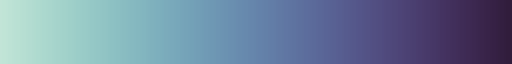

In [82]:
import seaborn as sns
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
cmap

In [96]:
# Convert matplotlib colormap to Plotly
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

# Apply the conversion function
plotly_cmap = matplotlib_to_plotly(cmap, 100)

fig = px.choropleth(cumulative_data, 
                    locations='Country', 
                    locationmode='ISO-3', 
                    color='Cumulative_Percentage', 
                    hover_name='Country', 
                    animation_frame='Year',
                    color_continuous_scale=plotly_cmap,
                    range_color=[0, 50],
                    title='Cumulative Top Performances by Country Over the Years (Cumulative %)',
                    template='plotly_dark')

fig.update_geos(showcoastlines=True, coastlinecolor="White", showland=True, landcolor="black")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Step 4: Display the Map
fig.show()